# Ensemble Learning
Group Challenge

***
by: Paul Bédier, Lukasz Pszenny, Lasse Schmidt

within: MS Data Sciences & Business Analytics

at: CentraleSupélec & ESSEC Business School
***

### 1. Import Packages

In [57]:
from importlib import reload
reload(prepData)

<module 'util.preprocess_data' from 'D:\\Dokumente\\2_Bildung\\2_MSc\\1_Classes\\Y2T2_Ensemble Learning\\4_challenge\\Ensemble-Learning-on-AirBnb-dataset\\util\\preprocess_data.py'>

In [58]:
# import own scripts
import util.preprocess_data as prepData

In [2]:
# parse & handle data
import csv
import numpy as np
import pandas as pd
from PIL import Image

# modeling tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# visualization
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# set matplotlib and seaborn settings for nicer plots
%matplotlib inline

SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### 2. Retrieve Data

In [5]:
# Retrieve data (including geographical dataframes); can take up to 1min
airbnb, lvl1, lvl2, lvl3, lvl4 = prepData.load_data()

In [52]:
# perform train test split
airbnb_train, airbnb_test = train_test_split(airbnb, test_size = 0.2)

# validate what happened
print(airbnb.shape)
print(airbnb_train.shape)
print(airbnb_test.shape)

(48895, 61)
(39116, 61)
(9779, 61)


In [59]:
# which columns we want to drop
drop_cols = ["name", "host_id", "geometry", "room_type", "last_review", "last_review_recency",
             "lvl1_GeoID", "lvl1_name", "lvl2_GeoID", "lvl2_name", "lvl3_GeoID", "lvl3_name",
             "lvl4_GeoID", "lvl4_name"]

# preprocess training data
prep_airbnb_train, impute_threshs, impute_geo_threshs, encode_threshs = prepData.prep_pipeline(airbnb_train,
                                                                                               lvl1, lvl2, lvl3, lvl4,
                                                                                               drop_cols = drop_cols)

# preprocess test data (using same thresholds as for training data)
prep_airbnb_test, _, _, _ = prepData.prep_pipeline(airbnb_test,
                                                   lvl1, lvl2, lvl3, lvl4,
                                                   drop_cols = drop_cols,
                                                   impute_threshs = impute_threshs,
                                                   impute_geo_threshs = impute_geo_threshs,
                                                   encode_threshs = encode_threshs)

In [60]:
# split data into X & y
X_train, y_train = prepData.split_frame(prep_airbnb_train)
X_test,  y_test  = prepData.split_frame(prep_airbnb_test)

# validate
print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

(39116, 54) (39116,)
(9779, 54) (9779,)


### 3. Start Modeling

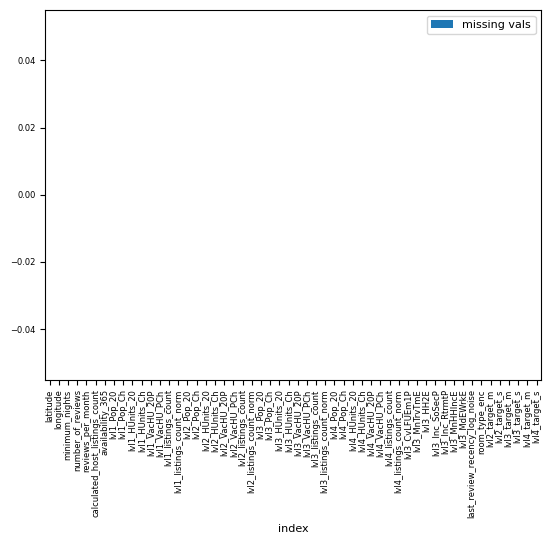

In [63]:
# train data must have no missing values
prepData.show_missing_vals(X_train)

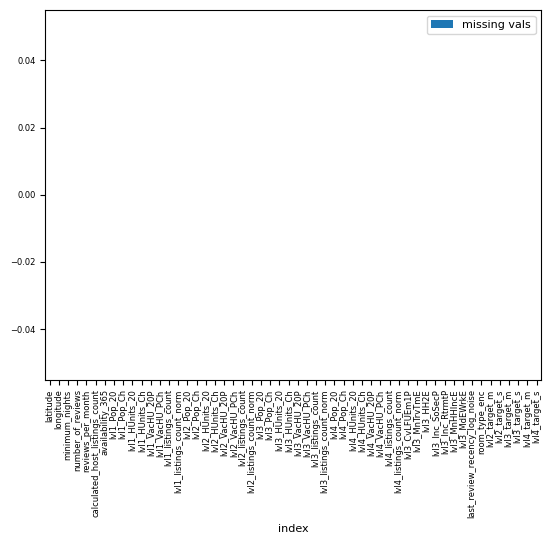

In [62]:
# test data must have no missing values
prepData.show_missing_vals(X_test)

In [64]:
# basic random forest model
clf = RandomForestRegressor(n_estimators = 100, criterion = "squared_error")
clf.fit(X_train, y_train)

# predict train
y_pred = clf.predict(X_train)
# compute R^2 metric
r2_train = r2_score(y_train, y_pred)

# predict test
y_pred = clf.predict(X_test)
# compute R^2 metric
r2_test = r2_score(y_test, y_pred)

print(f"R squared train: {r2_train}")
print(f"R squared train: {r2_test}")

R squared train: 0.8726522210549955
R squared train: 0.05719721800275046


In [27]:
# basic XGBoost
clf = XGBRegressor(n_estimators = 100, max_depth = 7, eta = 0.1, subsample = 0.7, colsample_bytree = 0.8)
clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_train)

# compute R^2 metric
r2_score(y_train, y_pred)

0.7300918451244958